# Benchmarks for DOD Game Design

First lets load in our benchmark code generated from the C++ program this comes from the files renderBench.txt and updateBench.txt

In [1]:
import numpy as np

renderFile=open('renderBench.txt',"r")
renderData=renderFile.readlines()

updateFile=open('updateBench.txt',"r")
updateData=updateFile.readlines()
timings={}
updateDurations=[]
renderDurations=[]
updateResolution=''
renderResolution=''
for i in updateData :
    if 'Duration' in i :
        data=i.split('\t')
        updateDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        updateResolution=data[1]
        
for i in renderData :
    if 'Duration' in i :
        data=i.split('\t')
        renderDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        renderResolution=data[1]
print('Number of elements {0}'.format(len(renderDurations)))
timings['render']=renderDurations
timings['update']=updateDurations


Number of elements 10995


Now we can do some data analysis on the times and see what happens

In [2]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

renderDF=pd.DataFrame(data=timings)
renderDF.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])



,render,update
count,10995.000000,10995.000000
mean,55.585357,2436.873852
std,26.018092,90.642536
min,34.000000,2319.000000
25%,40.000000,2388.000000
50%,45.000000,2405.000000
75%,65.000000,2445.000000
90%,87.000000,2548.000000
99%,144.000000,2788.060000
99.9%,243.126000,3219.006000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0e65f8>,
      dtype=object)

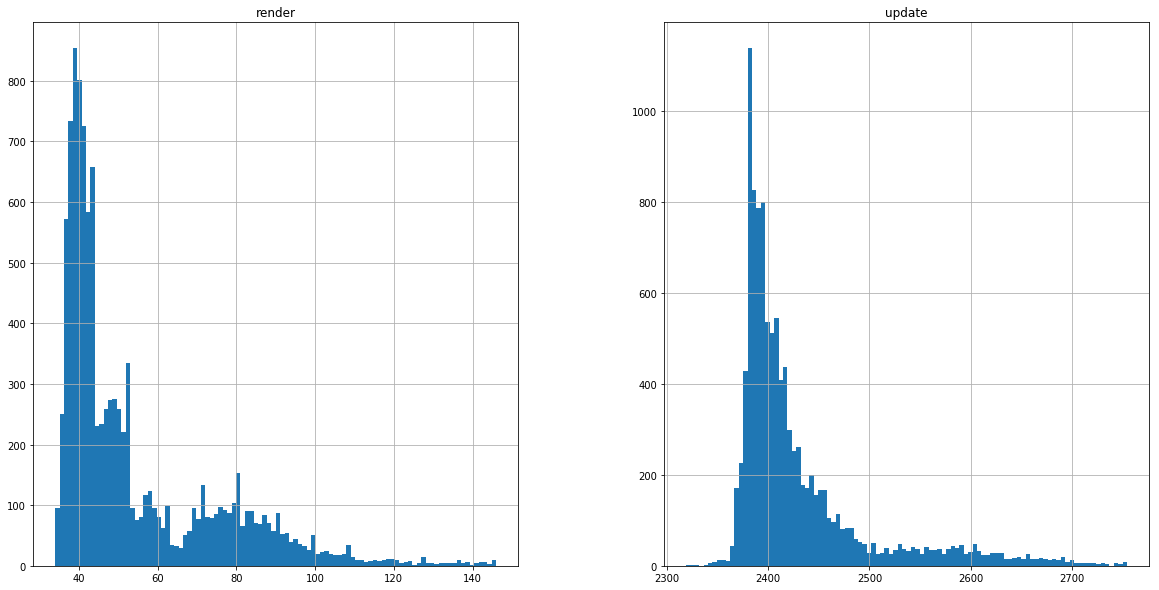

In [3]:
S = renderDF
S = S[~((S - S.mean()).abs() > 3.5 * S.std())]

ndf = pd.DataFrame(data=S)
#ndf['large'] = S
ndf.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])
ndf.hist(grid=True, figsize=(20, 10), bins=100 )
